In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np
import scipy.stats as st
import pandas as pd
from scipy.stats import f_oneway
import re

# 그래프 설정
sns.set()

# 그래프 기본 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 결측치 시각화를 위한 라이브러리
import missingno
df1 = pd.read_parquet('open/train/7.마케팅정보/201807_train_마케팅정보.parquet')
df1

,기준년월,ID,컨택건수_카드론_TM_B0M,컨택건수_리볼빙_TM_B0M,컨택건수_CA_TM_B0M,컨택건수_이용유도_TM_B0M,컨택건수_신용발급_TM_B0M,컨택건수_부대서비스_TM_B0M,컨택건수_포인트소진_TM_B0M,컨택건수_보험_TM_B0M,...,컨택건수_카드론_당사앱_R6M,컨택건수_CA_당사앱_R6M,컨택건수_리볼빙_당사앱_R6M,컨택건수_이용유도_당사앱_R6M,컨택건수_채권_B0M,컨택건수_FDS_B0M,컨택건수_채권_R6M,컨택건수_FDS_R6M,캠페인접촉건수_R12M,캠페인접촉일수_R12M
0,201807,TRAIN_000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1회 이상,1일 이상
1,201807,TRAIN_000001,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15회 이상,10일 이상
2,201807,TRAIN_000002,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1회 이상,1일 이상
3,201807,TRAIN_000003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1회 이상,1일 이상
4,201807,TRAIN_000004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1회 이상,1일 이상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,201807,TRAIN_399995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1회 이상,1일 이상
399996,201807,TRAIN_399996,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,15회 이상,15일 이상
399997,201807,TRAIN_399997,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1회 이상,1일 이상
399998,201807,TRAIN_399998,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1회 이상,1일 이상


### 6개월치 데이터를 합친다.

In [3]:
# 1) 마케팅정보 파일들이 모여 있는 폴더
DATA_DIR = Path("open/train/7.마케팅정보")

# 2) 201807~201812 사이의 train-마케팅정보 Parquet 파일만 모으기
parquet_files = sorted(
    DATA_DIR.glob("2018??_train_*.parquet"),          # 201807, 201808 …
    key=lambda p: re.match(r"(\d{6})", p.name).group(1)
)

print("읽을 파일:", [p.name for p in parquet_files])

# 3) 파일별로 읽어 month 컬럼 붙이고 리스트에 저장
df_list = []
for fp in parquet_files:
    df = pd.read_parquet(fp)
    df["month"] = fp.stem[:6]       # '201807' 같은 연월
    df_list.append(df)

# 4) 하나로 병합
df_marketing = pd.concat(df_list, ignore_index=True)

# 5) (선택) 새 파일로 저장
output_path = DATA_DIR / "train_마케팅정보_201807_201812.parquet"
df_marketing.to_parquet(output_path, index=False)

# 6) 확인
print("병합 완료! 행·열:", df_marketing.shape)
display(df_marketing.head())

읽을 파일: ['201807_train_마케팅정보.parquet', '201808_train_마케팅정보.parquet', '201809_train_마케팅정보.parquet', '201810_train_마케팅정보.parquet', '201811_train_마케팅정보.parquet', '201812_train_마케팅정보.parquet']
병합 완료! 행·열: (2400000, 65)


,기준년월,ID,컨택건수_카드론_TM_B0M,컨택건수_리볼빙_TM_B0M,컨택건수_CA_TM_B0M,컨택건수_이용유도_TM_B0M,컨택건수_신용발급_TM_B0M,컨택건수_부대서비스_TM_B0M,컨택건수_포인트소진_TM_B0M,컨택건수_보험_TM_B0M,...,컨택건수_CA_당사앱_R6M,컨택건수_리볼빙_당사앱_R6M,컨택건수_이용유도_당사앱_R6M,컨택건수_채권_B0M,컨택건수_FDS_B0M,컨택건수_채권_R6M,컨택건수_FDS_R6M,캠페인접촉건수_R12M,캠페인접촉일수_R12M,month
0,201807,TRAIN_000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,201807
1,201807,TRAIN_000001,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,15회 이상,10일 이상,201807
2,201807,TRAIN_000002,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,201807
3,201807,TRAIN_000003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,201807
4,201807,TRAIN_000004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,201807


In [4]:
df1 = pd.read_parquet('open/train/7.마케팅정보/train_마케팅정보_201807_201812.parquet')
df1

,기준년월,ID,컨택건수_카드론_TM_B0M,컨택건수_리볼빙_TM_B0M,컨택건수_CA_TM_B0M,컨택건수_이용유도_TM_B0M,컨택건수_신용발급_TM_B0M,컨택건수_부대서비스_TM_B0M,컨택건수_포인트소진_TM_B0M,컨택건수_보험_TM_B0M,...,컨택건수_CA_당사앱_R6M,컨택건수_리볼빙_당사앱_R6M,컨택건수_이용유도_당사앱_R6M,컨택건수_채권_B0M,컨택건수_FDS_B0M,컨택건수_채권_R6M,컨택건수_FDS_R6M,캠페인접촉건수_R12M,캠페인접촉일수_R12M,month
0,201807,TRAIN_000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,201807
1,201807,TRAIN_000001,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,15회 이상,10일 이상,201807
2,201807,TRAIN_000002,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,201807
3,201807,TRAIN_000003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,201807
4,201807,TRAIN_000004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,201807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,201812
2399996,201812,TRAIN_399996,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,20회 이상,15일 이상,201812
2399997,201812,TRAIN_399997,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,201812
2399998,201812,TRAIN_399998,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1회 이상,1일 이상,201812


In [5]:
df1.value_counts()

기준년월    ID            컨택건수_카드론_TM_B0M  컨택건수_리볼빙_TM_B0M  컨택건수_CA_TM_B0M  컨택건수_이용유도_TM_B0M  컨택건수_신용발급_TM_B0M  컨택건수_부대서비스_TM_B0M  컨택건수_포인트소진_TM_B0M  컨택건수_보험_TM_B0M  컨택건수_카드론_LMS_B0M  컨택건수_CA_LMS_B0M  컨택건수_리볼빙_LMS_B0M  컨택건수_이용유도_LMS_B0M  컨택건수_카드론_EM_B0M  컨택건수_CA_EM_B0M  컨택건수_리볼빙_EM_B0M  컨택건수_이용유도_EM_B0M  컨택건수_카드론_청구서_B0M  컨택건수_CA_청구서_B0M  컨택건수_리볼빙_청구서_B0M  컨택건수_이용유도_청구서_B0M  컨택건수_카드론_인터넷_B0M  컨택건수_CA_인터넷_B0M  컨택건수_리볼빙_인터넷_B0M  컨택건수_이용유도_인터넷_B0M  컨택건수_카드론_당사앱_B0M  컨택건수_CA_당사앱_B0M  컨택건수_리볼빙_당사앱_B0M  컨택건수_이용유도_당사앱_B0M  컨택건수_카드론_TM_R6M  컨택건수_CA_TM_R6M  컨택건수_리볼빙_TM_R6M  컨택건수_이용유도_TM_R6M  컨택건수_신용발급_TM_R6M  컨택건수_부대서비스_TM_R6M  컨택건수_포인트소진_TM_R6M  컨택건수_보험_TM_R6M  컨택건수_카드론_LMS_R6M  컨택건수_CA_LMS_R6M  컨택건수_리볼빙_LMS_R6M  컨택건수_이용유도_LMS_R6M  컨택건수_카드론_EM_R6M  컨택건수_CA_EM_R6M  컨택건수_리볼빙_EM_R6M  컨택건수_이용유도_EM_R6M  컨택건수_카드론_청구서_R6M  컨택건수_CA_청구서_R6M  컨택건수_리볼빙_청구서_R6M  컨택건수_이용유도_청구서_R6M  컨택건수_카드론_인터넷_R6M  컨택건수_CA_인터넷_R6M  컨택건수_리볼빙_인터넷_R6M  컨택건수_이용유도_인터넷_R6M  컨택건수_카드론_당사앱_R6M  컨택건수_CA_당사앱_R6M  컨택건수_리볼빙_당사앱_R6M  컨택건수_

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 65 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   기준년월               int64 
 1   ID                 object
 2   컨택건수_카드론_TM_B0M    int64 
 3   컨택건수_리볼빙_TM_B0M    int64 
 4   컨택건수_CA_TM_B0M     int64 
 5   컨택건수_이용유도_TM_B0M   int64 
 6   컨택건수_신용발급_TM_B0M   int64 
 7   컨택건수_부대서비스_TM_B0M  int64 
 8   컨택건수_포인트소진_TM_B0M  int64 
 9   컨택건수_보험_TM_B0M     int64 
 10  컨택건수_카드론_LMS_B0M   int64 
 11  컨택건수_CA_LMS_B0M    int64 
 12  컨택건수_리볼빙_LMS_B0M   int64 
 13  컨택건수_이용유도_LMS_B0M  int64 
 14  컨택건수_카드론_EM_B0M    int64 
 15  컨택건수_CA_EM_B0M     int64 
 16  컨택건수_리볼빙_EM_B0M    int64 
 17  컨택건수_이용유도_EM_B0M   int64 
 18  컨택건수_카드론_청구서_B0M   int64 
 19  컨택건수_CA_청구서_B0M    int64 
 20  컨택건수_리볼빙_청구서_B0M   int64 
 21  컨택건수_이용유도_청구서_B0M  int64 
 22  컨택건수_카드론_인터넷_B0M   int64 
 23  컨택건수_CA_인터넷_B0M    int64 
 24  컨택건수_리볼빙_인터넷_B0M   int64 
 25  컨택건수_이용유도_인터넷_B0M  int64 
 26  컨택건수_카드론_당사앱_B

In [7]:
df1.describe()

,기준년월,컨택건수_카드론_TM_B0M,컨택건수_리볼빙_TM_B0M,컨택건수_CA_TM_B0M,컨택건수_이용유도_TM_B0M,컨택건수_신용발급_TM_B0M,컨택건수_부대서비스_TM_B0M,컨택건수_포인트소진_TM_B0M,컨택건수_보험_TM_B0M,컨택건수_카드론_LMS_B0M,...,컨택건수_리볼빙_인터넷_R6M,컨택건수_이용유도_인터넷_R6M,컨택건수_카드론_당사앱_R6M,컨택건수_CA_당사앱_R6M,컨택건수_리볼빙_당사앱_R6M,컨택건수_이용유도_당사앱_R6M,컨택건수_채권_B0M,컨택건수_FDS_B0M,컨택건수_채권_R6M,컨택건수_FDS_R6M
count,2.400000e+06,2.400000e+06,2.400000e+06,2400000.0,2.400000e+06,2.400000e+06,2.400000e+06,2400000.0,2.400000e+06,2.400000e+06,...,2400000.0,2.400000e+06,2400000.0,2400000.0,2400000.0,2.400000e+06,2.400000e+06,2400000.0,2.400000e+06,2400000.0
mean,2.018095e+05,1.657625e-01,6.666667e-06,0.0,7.920292e-02,2.500000e-06,4.166667e-07,0.0,1.316500e-02,4.089167e-03,...,0.0,2.359363e+00,0.0,0.0,0.0,7.004167e-04,2.744625e-02,0.0,4.281692e-01,0.0
std,1.707825e+00,6.976548e-01,3.162271e-03,0.0,4.768350e-01,1.581137e-03,6.454972e-04,0.0,1.139811e-01,6.381573e-02,...,0.0,2.087587e+00,0.0,0.0,0.0,4.600645e-02,3.823193e-01,0.0,2.160925e+00,0.0
min,2.018070e+05,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
25%,2.018080e+05,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
50%,2.018095e+05,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.0,2.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
75%,2.018110e+05,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,...,0.0,4.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0
max,2.018120e+05,4.000000e+00,2.000000e+00,0.0,3.000000e+00,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00,...,0.0,9.000000e+00,0.0,0.0,0.0,4.000000e+00,8.000000e+00,0.0,3.900000e+01,0.0


In [8]:
# 중복된 행, 열 확인
df1.duplicated().sum()

0

### 합친 parquet 파일에 segment 붙이기

In [10]:
# ── 1) 파일 읽기 ───────────────────────────────────────────
path_member   = Path("open/train/1.회원정보/201807_train_회원정보.parquet")    # 회원정보(컬럼 보유)
path_marketing = Path("open/train/7.마케팅정보/train_마케팅정보_201807_201812.parquet")  # 마케팅정보(붙일 대상)

member_df   = pd.read_parquet(path_member)
marketing_df = pd.read_parquet(path_marketing)

# ── 2) Segment 컬럼만 추출 → ID 기준으로 병합 ───────────────
segment_df = member_df[["ID", "Segment"]]          # (필요 컬럼만)
marketing_df = marketing_df.merge(segment_df, on="ID", how="left")

# ── 4) 결과 저장 ───────────────────────────────────────────
marketing_df.to_parquet("open/train/7.마케팅정보/train_마케팅정보_201807_201812_segment.parquet",
                    index=False)

print("✔ Segment 컬럼 이동 완료!")

✔ Segment 컬럼 이동 완료!


In [11]:
df2 = pd.read_parquet('open/train/7.마케팅정보/train_마케팅정보_201807_201812_segment.parquet')
df2

,기준년월,ID,컨택건수_카드론_TM_B0M,컨택건수_리볼빙_TM_B0M,컨택건수_CA_TM_B0M,컨택건수_이용유도_TM_B0M,컨택건수_신용발급_TM_B0M,컨택건수_부대서비스_TM_B0M,컨택건수_포인트소진_TM_B0M,컨택건수_보험_TM_B0M,...,컨택건수_리볼빙_당사앱_R6M,컨택건수_이용유도_당사앱_R6M,컨택건수_채권_B0M,컨택건수_FDS_B0M,컨택건수_채권_R6M,컨택건수_FDS_R6M,캠페인접촉건수_R12M,캠페인접촉일수_R12M,month,Segment
0,201807,TRAIN_000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1회 이상,1일 이상,201807,D
1,201807,TRAIN_000001,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,15회 이상,10일 이상,201807,E
2,201807,TRAIN_000002,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1회 이상,1일 이상,201807,C
3,201807,TRAIN_000003,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1회 이상,1일 이상,201807,D
4,201807,TRAIN_000004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1회 이상,1일 이상,201807,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1회 이상,1일 이상,201812,E
2399996,201812,TRAIN_399996,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,20회 이상,15일 이상,201812,D
2399997,201812,TRAIN_399997,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1회 이상,1일 이상,201812,C
2399998,201812,TRAIN_399998,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1회 이상,1일 이상,201812,E


In [12]:
df2['Segment'].isna().sum()

0

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 66 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   기준년월               int64 
 1   ID                 object
 2   컨택건수_카드론_TM_B0M    int64 
 3   컨택건수_리볼빙_TM_B0M    int64 
 4   컨택건수_CA_TM_B0M     int64 
 5   컨택건수_이용유도_TM_B0M   int64 
 6   컨택건수_신용발급_TM_B0M   int64 
 7   컨택건수_부대서비스_TM_B0M  int64 
 8   컨택건수_포인트소진_TM_B0M  int64 
 9   컨택건수_보험_TM_B0M     int64 
 10  컨택건수_카드론_LMS_B0M   int64 
 11  컨택건수_CA_LMS_B0M    int64 
 12  컨택건수_리볼빙_LMS_B0M   int64 
 13  컨택건수_이용유도_LMS_B0M  int64 
 14  컨택건수_카드론_EM_B0M    int64 
 15  컨택건수_CA_EM_B0M     int64 
 16  컨택건수_리볼빙_EM_B0M    int64 
 17  컨택건수_이용유도_EM_B0M   int64 
 18  컨택건수_카드론_청구서_B0M   int64 
 19  컨택건수_CA_청구서_B0M    int64 
 20  컨택건수_리볼빙_청구서_B0M   int64 
 21  컨택건수_이용유도_청구서_B0M  int64 
 22  컨택건수_카드론_인터넷_B0M   int64 
 23  컨택건수_CA_인터넷_B0M    int64 
 24  컨택건수_리볼빙_인터넷_B0M   int64 
 25  컨택건수_이용유도_인터넷_B0M  int64 
 26  컨택건수_카드론_당사앱_B

### 필요없는 컬럼 삭제

In [15]:
# 2) 상수 컬럼 찾기 (결측치 포함)
const_cols = df2.columns[df2.nunique(dropna=False) == 1]
#print("상수 컬럼:", list(const_cols))

# 3) 상수 컬럼 삭제
df3 = df2.drop(columns=const_cols)

for col in df3.columns:
    print(f"\n===== [ {col} ] =====")
    
    # 1) 값 분포 (결측치 포함)
    print("▶ value_counts (dropna=False)")
    print(df3[col].value_counts(dropna=False))
# 4) 결과 저장
df3.to_parquet("201807_201812_segment_컬럼제거", index=False)
#print("상수 컬럼 제거 후 저장 완료!")


===== [ 기준년월 ] =====
▶ value_counts (dropna=False)
기준년월
201807    400000
201808    400000
201809    400000
201810    400000
201811    400000
201812    400000
Name: count, dtype: int64

===== [ ID ] =====
▶ value_counts (dropna=False)
ID
TRAIN_000000    6
TRAIN_266650    6
TRAIN_266672    6
TRAIN_266671    6
TRAIN_266670    6
               ..
TRAIN_133331    6
TRAIN_133330    6
TRAIN_133329    6
TRAIN_133328    6
TRAIN_399999    6
Name: count, Length: 400000, dtype: int64

===== [ 컨택건수_카드론_TM_B0M ] =====
▶ value_counts (dropna=False)
컨택건수_카드론_TM_B0M
0    2270769
3     119054
4      10157
2         20
Name: count, dtype: int64

===== [ 컨택건수_리볼빙_TM_B0M ] =====
▶ value_counts (dropna=False)
컨택건수_리볼빙_TM_B0M
0    2399988
1          8
2          4
Name: count, dtype: int64

===== [ 컨택건수_이용유도_TM_B0M ] =====
▶ value_counts (dropna=False)
컨택건수_이용유도_TM_B0M
0    2335052
3      60191
2       4757
Name: count, dtype: int64

===== [ 컨택건수_신용발급_TM_B0M ] =====
▶ value_counts (dropna=False)
컨택건수_신용발급_T

In [16]:
df3 = pd.read_parquet('open/train/7.마케팅정보/파생/201807_201812_segment_컬럼제거.parquet')
df3

,기준년월,ID,컨택건수_카드론_TM_B0M,컨택건수_리볼빙_TM_B0M,컨택건수_이용유도_TM_B0M,컨택건수_신용발급_TM_B0M,컨택건수_부대서비스_TM_B0M,컨택건수_보험_TM_B0M,컨택건수_카드론_LMS_B0M,컨택건수_CA_LMS_B0M,...,컨택건수_CA_청구서_R6M,컨택건수_이용유도_청구서_R6M,컨택건수_이용유도_인터넷_R6M,컨택건수_이용유도_당사앱_R6M,컨택건수_채권_B0M,컨택건수_채권_R6M,캠페인접촉건수_R12M,캠페인접촉일수_R12M,month,Segment
0,201807,TRAIN_000000,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,1회 이상,1일 이상,201807,D
1,201807,TRAIN_000001,3,0,0,0,0,0,0,0,...,2,1,6,0,0,0,15회 이상,10일 이상,201807,E
2,201807,TRAIN_000002,0,0,0,0,0,0,0,0,...,0,1,3,0,0,0,1회 이상,1일 이상,201807,C
3,201807,TRAIN_000003,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,1회 이상,1일 이상,201807,D
4,201807,TRAIN_000004,0,0,0,0,0,0,0,0,...,0,4,1,0,0,0,1회 이상,1일 이상,201807,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1회 이상,1일 이상,201812,E
2399996,201812,TRAIN_399996,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,20회 이상,15일 이상,201812,D
2399997,201812,TRAIN_399997,0,0,0,0,0,0,0,0,...,0,6,0,0,0,0,1회 이상,1일 이상,201812,C
2399998,201812,TRAIN_399998,0,0,0,0,0,0,0,0,...,0,4,1,0,0,0,1회 이상,1일 이상,201812,E


### 결측치 확인

In [18]:
df3.isna().sum()

기준년월                 0
ID                   0
컨택건수_카드론_TM_B0M      0
컨택건수_리볼빙_TM_B0M      0
컨택건수_이용유도_TM_B0M     0
컨택건수_신용발급_TM_B0M     0
컨택건수_부대서비스_TM_B0M    0
컨택건수_보험_TM_B0M       0
컨택건수_카드론_LMS_B0M     0
컨택건수_CA_LMS_B0M      0
컨택건수_리볼빙_LMS_B0M     0
컨택건수_이용유도_LMS_B0M    0
컨택건수_카드론_EM_B0M      0
컨택건수_이용유도_EM_B0M     0
컨택건수_카드론_청구서_B0M     0
컨택건수_CA_청구서_B0M      0
컨택건수_이용유도_청구서_B0M    0
컨택건수_이용유도_인터넷_B0M    0
컨택건수_이용유도_당사앱_B0M    0
컨택건수_카드론_TM_R6M      0
컨택건수_CA_TM_R6M       0
컨택건수_리볼빙_TM_R6M      0
컨택건수_이용유도_TM_R6M     0
컨택건수_신용발급_TM_R6M     0
컨택건수_부대서비스_TM_R6M    0
컨택건수_포인트소진_TM_R6M    0
컨택건수_보험_TM_R6M       0
컨택건수_카드론_LMS_R6M     0
컨택건수_CA_LMS_R6M      0
컨택건수_리볼빙_LMS_R6M     0
컨택건수_이용유도_LMS_R6M    0
컨택건수_카드론_EM_R6M      0
컨택건수_이용유도_EM_R6M     0
컨택건수_카드론_청구서_R6M     0
컨택건수_CA_청구서_R6M      0
컨택건수_이용유도_청구서_R6M    0
컨택건수_이용유도_인터넷_R6M    0
컨택건수_이용유도_당사앱_R6M    0
컨택건수_채권_B0M          0
컨택건수_채권_R6M          0
캠페인접촉건수_R12M         0
캠페인접촉일수_R12M         0
month                0
Segment    

### 범주형, 숫자형 데이터 확인

In [24]:
cardinality = df3.nunique().sort_values(ascending=False)
print(cardinality)

ID                   400000
컨택건수_이용유도_EM_R6M         79
컨택건수_채권_R6M              40
컨택건수_카드론_TM_R6M          25
컨택건수_이용유도_LMS_R6M        22
컨택건수_이용유도_TM_R6M         19
컨택건수_이용유도_EM_B0M         14
컨택건수_이용유도_청구서_R6M        13
컨택건수_이용유도_인터넷_R6M        10
컨택건수_CA_청구서_R6M           7
컨택건수_카드론_LMS_R6M          7
컨택건수_보험_TM_R6M            7
month                     6
캠페인접촉건수_R12M              6
컨택건수_채권_B0M               6
기준년월                      6
Segment                   5
캠페인접촉일수_R12M              5
컨택건수_CA_TM_R6M            5
컨택건수_리볼빙_TM_R6M           5
컨택건수_이용유도_당사앱_R6M         5
컨택건수_CA_LMS_R6M           5
컨택건수_카드론_EM_R6M           4
컨택건수_카드론_TM_B0M           4
컨택건수_부대서비스_TM_R6M         4
컨택건수_이용유도_LMS_B0M         4
컨택건수_리볼빙_TM_B0M           3
컨택건수_이용유도_TM_B0M          3
컨택건수_카드론_청구서_R6M          3
컨택건수_CA_LMS_B0M           3
컨택건수_이용유도_청구서_B0M         3
컨택건수_리볼빙_LMS_R6M          3
컨택건수_포인트소진_TM_R6M         3
컨택건수_신용발급_TM_R6M          3
컨택건수_이용유도_당사앱_B0M         3
컨택건수_이용유도_인터넷_B0M   

In [26]:
df4 = df3.copy()

# 1) dtype 기반 분리
num_cols = df4.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df4.select_dtypes(include=["object", "string", "category"]).columns.tolist()

# 2) 결과 확인
print(f"숫자형  컬럼 개수: {len(num_cols)}")
print(f"범주형 컬럼 개수: {len(cat_cols)}\n")

print("▶ 숫자형:", num_cols)
print("▶ 범주형:", cat_cols)

숫자형  컬럼 개수: 39
범주형 컬럼 개수: 5

▶ 숫자형: ['기준년월', '컨택건수_카드론_TM_B0M', '컨택건수_리볼빙_TM_B0M', '컨택건수_이용유도_TM_B0M', '컨택건수_신용발급_TM_B0M', '컨택건수_부대서비스_TM_B0M', '컨택건수_보험_TM_B0M', '컨택건수_카드론_LMS_B0M', '컨택건수_CA_LMS_B0M', '컨택건수_리볼빙_LMS_B0M', '컨택건수_이용유도_LMS_B0M', '컨택건수_카드론_EM_B0M', '컨택건수_이용유도_EM_B0M', '컨택건수_카드론_청구서_B0M', '컨택건수_CA_청구서_B0M', '컨택건수_이용유도_청구서_B0M', '컨택건수_이용유도_인터넷_B0M', '컨택건수_이용유도_당사앱_B0M', '컨택건수_카드론_TM_R6M', '컨택건수_CA_TM_R6M', '컨택건수_리볼빙_TM_R6M', '컨택건수_이용유도_TM_R6M', '컨택건수_신용발급_TM_R6M', '컨택건수_부대서비스_TM_R6M', '컨택건수_포인트소진_TM_R6M', '컨택건수_보험_TM_R6M', '컨택건수_카드론_LMS_R6M', '컨택건수_CA_LMS_R6M', '컨택건수_리볼빙_LMS_R6M', '컨택건수_이용유도_LMS_R6M', '컨택건수_카드론_EM_R6M', '컨택건수_이용유도_EM_R6M', '컨택건수_카드론_청구서_R6M', '컨택건수_CA_청구서_R6M', '컨택건수_이용유도_청구서_R6M', '컨택건수_이용유도_인터넷_R6M', '컨택건수_이용유도_당사앱_R6M', '컨택건수_채권_B0M', '컨택건수_채권_R6M']
▶ 범주형: ['ID', '캠페인접촉건수_R12M', '캠페인접촉일수_R12M', 'month', 'Segment']


In [28]:
df4[cat_cols].nunique().sort_values(ascending=False)

ID              400000
캠페인접촉건수_R12M         6
month                6
캠페인접촉일수_R12M         5
Segment              5
dtype: int64

<Axes: xlabel='캠페인접촉건수_R12M'>

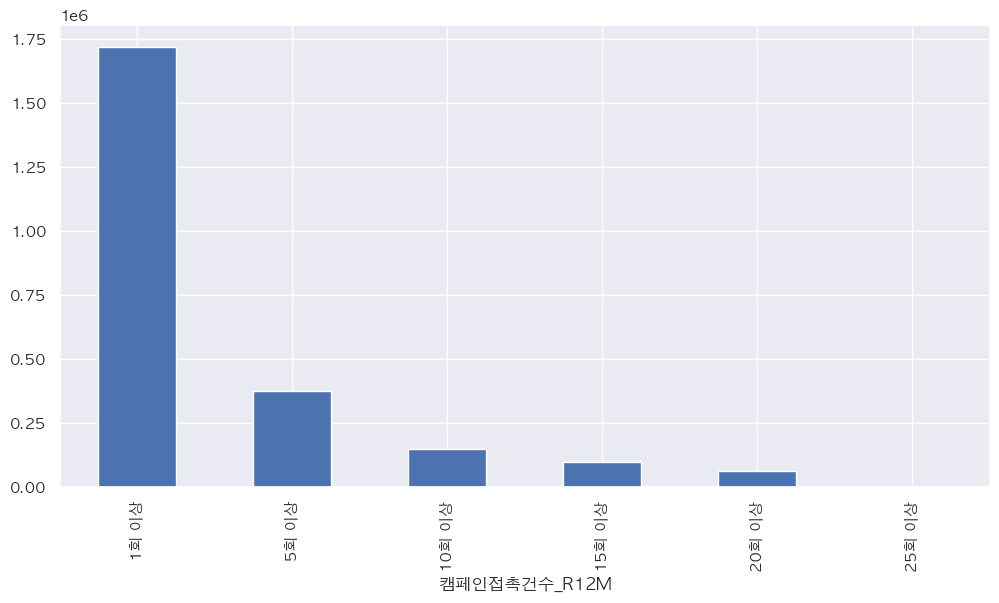

In [30]:
df4['캠페인접촉건수_R12M'].value_counts().plot.bar()

### Segment 와 범주형 데이터 간의 연관성 - 교차표 + 카이제곱 검정

In [33]:
ycol = "Segment"             # 타깃 컬럼
cat_cols = ['캠페인접촉건수_R12M', '캠페인접촉일수_R12M'] # 범주형 컬럼 리스트

results = []

for col in cat_cols:
    ct = pd.crosstab(df4[col], df4[ycol])            # 교차표
    chi2, p, dof, _ = chi2_contingency(ct)
    results.append({"column": col,
                    "chi2": chi2,
                    "dof": dof,
                    "p_value": p,
                    "n_levels": len(ct)})

# 결과를 p-value 오름차순으로 정렬
chi_df = (pd.DataFrame(results)
            .sort_values("p_value")
            .reset_index(drop=True))

display(chi_df.head(20))        # p-value가 작은 컬럼 Top 20

,column,chi2,dof,p_value,n_levels
0,캠페인접촉건수_R12M,4907.56706,20,0.0,6
1,캠페인접촉일수_R12M,5102.92825,16,0.0,5


In [34]:
def cramers_v(ct):
    chi2, _, _, _ = st.chi2_contingency(ct)
    n = ct.sum().sum()
    k = min(ct.shape)-1
    return np.sqrt(chi2 / (n * k))

for col in ["캠페인접촉건수_R12M", "캠페인접촉일수_R12M"]:
    ct = pd.crosstab(df4[col], df4["Segment"])
    print(f"{col:25}: Cramér's V = {cramers_v(ct):.3f}")

캠페인접촉건수_R12M             : Cramér's V = 0.023
캠페인접촉일수_R12M             : Cramér's V = 0.023


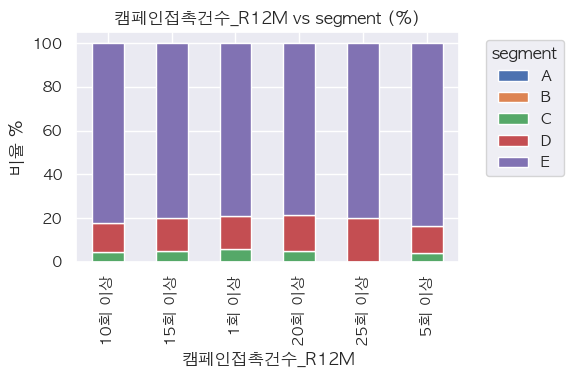

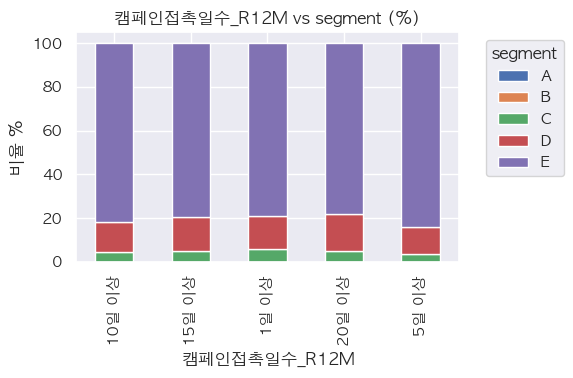

In [37]:
for col in ["캠페인접촉건수_R12M", "캠페인접촉일수_R12M"]:
    ct_pct = (pd.crosstab(df4[col], df4["Segment"], normalize="index")*100)
    ct_pct.plot(kind="bar", stacked=True, figsize=(6,4))
    plt.title(f"{col} vs segment (%)")
    plt.ylabel("비율 %")
    plt.legend(title="segment", bbox_to_anchor=(1.05,1), loc="upper left")
    plt.tight_layout()
    plt.show()

- 두 컬럼 모두 E의 비율이 압도적으로 많다.
- A,B는 아예 없다.

- 카이제곱 검정 결과와 시각화 해본 결과 2개의 범주형 데이터 컬럼과 Segment 컬럼 간의 유의미한 상관관계는 없으므로 삭제한다.

### Segment와 수치형 데이터 컬럼들 간의 상관관계

In [42]:
y = "Segment"
anova_res = []

for col in num_cols:
    # segment별 값 리스트 만들기
    groups = [ df4[df4[y]==s][col].dropna().values for s in df4[y].unique() ]
    # 그룹 수가 2개 이상 & 각 그룹에 최소 10개 이상 값이 있을 때만 진행
    if sum(len(g)>=10 for g in groups) < len(groups): 
        continue
    
    F, p = f_oneway(*groups)
    
    # η² 계산
    grand_mean = df4[col].mean()
    ss_between = sum(len(g) * (g.mean()-grand_mean)**2 for g in map(pd.Series, groups))
    ss_total   = ((df4[col]-grand_mean)**2).sum()
    eta2 = ss_between / ss_total if ss_total else 0
    
    anova_res.append({"column": col, "F": F, "p": p, "eta2": eta2})

anova_df = (pd.DataFrame(anova_res)
              .sort_values(["p","eta2"])
              .reset_index(drop=True))

display(anova_df)

,column,F,p,eta2
0,컨택건수_채권_R6M,382.803374,0.000000e+00,6.376002e-04
1,컨택건수_보험_TM_R6M,583.332442,0.000000e+00,9.712785e-04
2,컨택건수_포인트소진_TM_R6M,621.838542,0.000000e+00,1.035327e-03
3,컨택건수_이용유도_청구서_R6M,789.392718,0.000000e+00,1.313929e-03
4,컨택건수_이용유도_LMS_B0M,1108.706467,0.000000e+00,1.844440e-03
5,컨택건수_신용발급_TM_R6M,1325.637536,0.000000e+00,2.204530e-03
6,컨택건수_이용유도_인터넷_R6M,2380.952178,0.000000e+00,3.952577e-03
7,컨택건수_이용유도_TM_B0M,3340.871250,0.000000e+00,5.537298e-03
8,컨택건수_이용유도_청구서_B0M,4167.442854,0.000000e+00,6.897842e-03
9,컨택건수_이용유도_EM_B0M,12029.212907,0.000000e+00,1.965468e-02


/var/folders/jx/wyfvg62d5d5d8wpjxv_9rnxw0000gn/T/ipykernel_79392/193174720.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[str(s) for s in segments], showfliers=False)
/var/folders/jx/wyfvg62d5d5d8wpjxv_9rnxw0000gn/T/ipykernel_79392/193174720.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[str(s) for s in segments], showfliers=False)
/var/folders/jx/wyfvg62d5d5d8wpjxv_9rnxw0000gn/T/ipykernel_79392/193174720.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=[str(s) for s in segments], showfliers=False)
/var/folders/jx/wyfvg62d5d5d

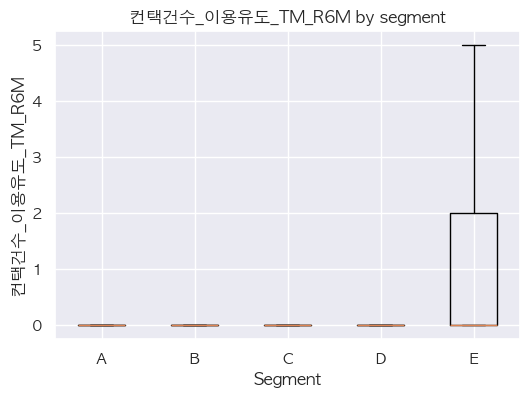

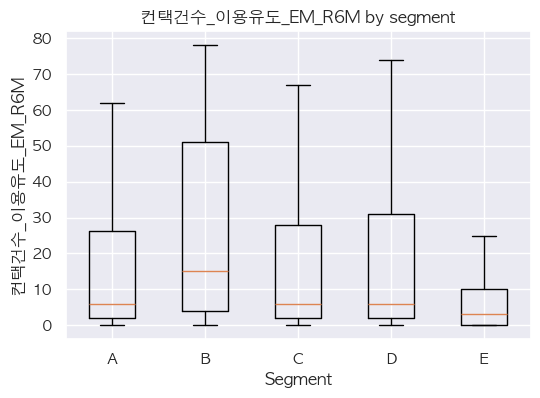

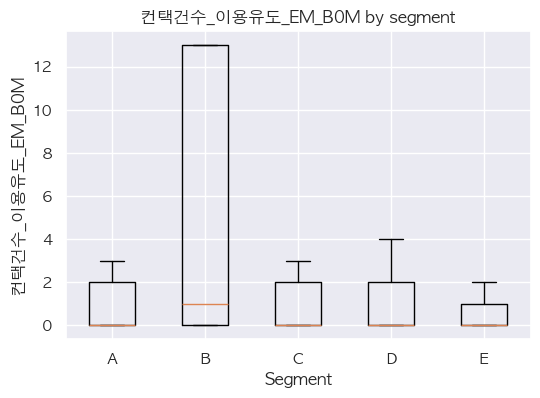

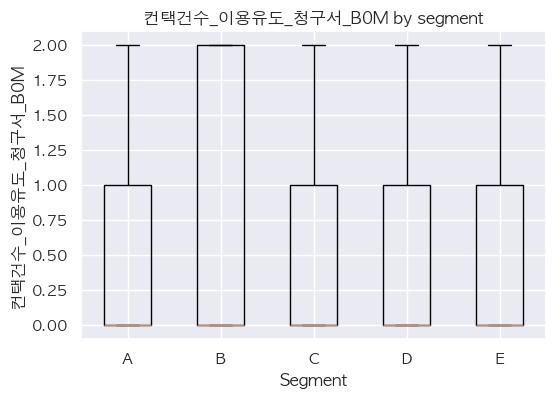

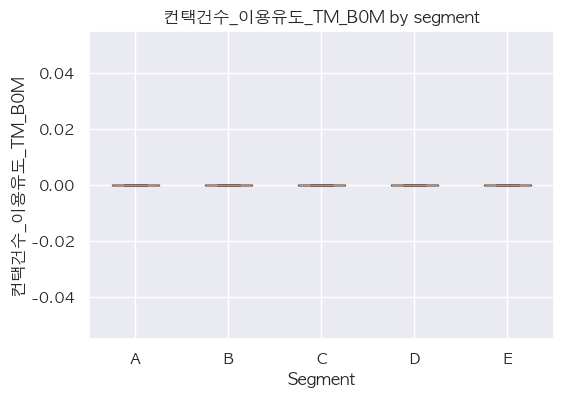

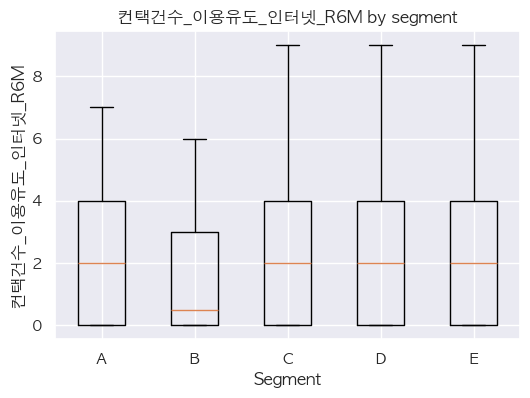

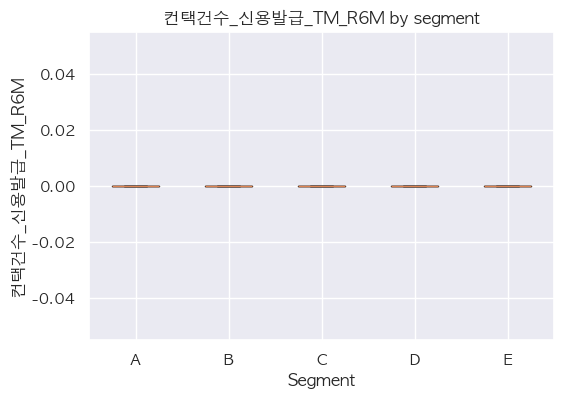

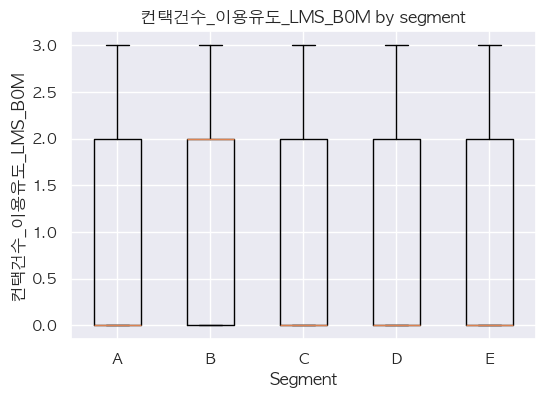

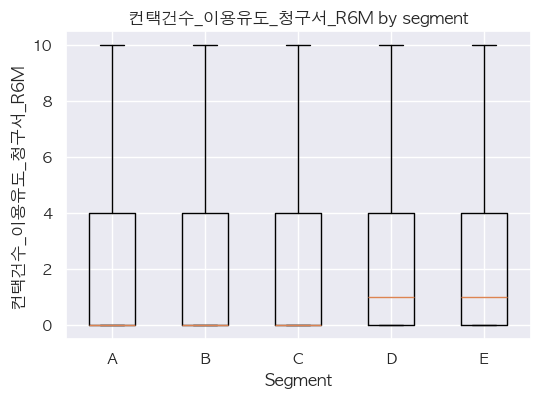

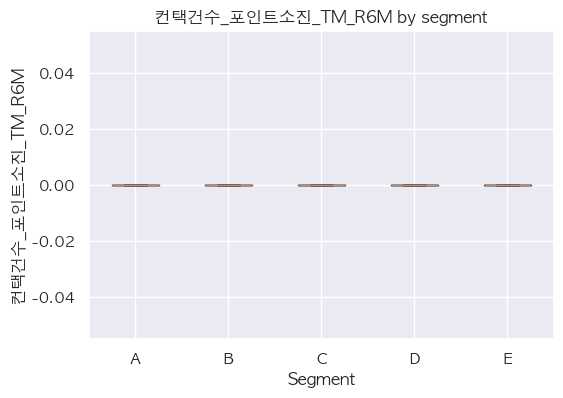

In [44]:
# 1) 수치형 컬럼 목록 (ID 류는 제외)
NUM_COLS = df4.select_dtypes(include=["int64", "float64"]).columns.tolist()
ID_LIKE = ["customer_id", "contract_id", "ID"]
num_cols = [c for c in NUM_COLS if c not in ID_LIKE]

# 2) ANOVA (F, p, eta^2) 계산
results = []
segments = sorted(df4["Segment"].unique())

for col in num_cols:
    groups = [df4[df4["Segment"] == s][col].dropna().values for s in segments]
    if sum(len(g) >= 10 for g in groups) < len(groups):
        continue  # 각 그룹에 샘플이 10개 미만이면 스킵

    F, p = f_oneway(*groups)

    grand_mean = df4[col].mean()
    ss_between = sum(len(g) * (g.mean() - grand_mean) ** 2 for g in map(pd.Series, groups))
    ss_total = ((df4[col] - grand_mean) ** 2).sum()
    eta2 = ss_between / ss_total if ss_total else 0

    results.append({"column": col, "F": F, "p": p, "eta2": eta2})

anova_df = pd.DataFrame(results).sort_values("eta2", ascending=False).reset_index(drop=True)

# 3) 상위 10개 eta^2 변수만 시각화 (Boxplot)
top_cols = anova_df.head(10)["column"].tolist()

for col in top_cols:
    plt.figure(figsize=(6, 4))
    data = [df4[df4["Segment"] == s][col].dropna() for s in segments]
    plt.boxplot(data, labels=[str(s) for s in segments], showfliers=False)
    plt.title(f"{col} by segment")
    plt.xlabel("Segment")
    plt.ylabel(col)

### Segment 컬럼과 다른 수치형 컬럼들 간의 상관계수 확인
- Segment 컬럼을 숫자 데이터로 인코딩한다. (원핫인코딩)
- 탐색적 목적으로만 사용해서 본다.
- 다중공선성 문제가 생길 수 있으므로 분석 리포트에 직접 인용은 무리이다.

In [47]:
# Segment 원핫 인코딩
segment_dummies = pd.get_dummies(df4["Segment"], prefix="Segment")

# 수치형 변수만 추출
num_df = df4.select_dtypes(include=["int64", "float64"])

# 병합
df_corr = pd.concat([num_df, segment_dummies], axis=1)

# 상관계수 계산
corr = df_corr.corr().loc[segment_dummies.columns, num_df.columns]

# 보기 좋게 transpose, A-E 넣어서 확인, Segemnt-컬럼들 피벗.
corr.T.sort_values(by="Segment_E", ascending=False).head(10)

,Segment_A,Segment_B,Segment_C,Segment_D,Segment_E
컨택건수_이용유도_TM_R6M,-0.009532,-0.002345,-0.088753,-0.116556,0.153303
컨택건수_이용유도_TM_B0M,-0.003343,-0.001287,-0.037540,-0.060123,0.074370
컨택건수_이용유도_인터넷_R6M,-0.003167,-0.003060,-0.045844,-0.038043,0.059565
컨택건수_신용발급_TM_R6M,-0.002027,-0.000780,-0.023288,-0.038210,0.046939
컨택건수_보험_TM_R6M,-0.001545,0.001209,-0.017122,-0.024153,0.031000
컨택건수_카드론_TM_R6M,-0.003318,-0.000530,-0.021215,-0.009847,0.020791
컨택건수_카드론_LMS_R6M,-0.003817,0.000128,-0.021723,-0.006421,0.018063
컨택건수_CA_LMS_R6M,-0.001085,-0.000625,-0.019883,-0.000459,0.011642
컨택건수_이용유도_인터넷_B0M,0.000680,-0.001410,-0.012240,-0.003393,0.009866
컨택건수_리볼빙_TM_R6M,0.001265,0.000449,-0.006887,-0.004552,0.007816


##### 각 Segment 별 가장 큰 값
- Segment A : 0.011625
- Segment B : 0.005389
- Segment C : 0.064075
- Segment D : 0.124387
- Segment E : 0.153303
- 전체적으로 연관이 크게 있지 않음. + 각 Segment 컬럼 간의 다중공선성 문제 존재